In [75]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")


# read in group comparison results from skyline
quant_df = pd.read_csv('D:/Penn/proj/collab_greer/results/merged_skyline_groupcomparisons_abundances.csv')
#quant_df['Total Area Fragment'] = quant_df['Total Area Fragment'].replace(np.nan, 0)

# get just one mark to test on
test_df = quant_df[quant_df['Peptide'] == 'TKQTAR']


# throw out any non-histone marks
test_df.head()

,Protein,Peptide,Peptide Modified Sequence,MS Level,histone mark,Acquisition,Normalized Abundance,Sample Group
27,"sp|O15819|H33A_DICDI,sp|Q55BN9|H33B_DICDI",TKQTAR,TK[+28]QTAR,2.0,K4[me2],20201123_LKP_QEHF_greer_01_DIA_020 Abundance,1.8725,vegetative
31,"sp|O15819|H33A_DICDI,sp|Q55BN9|H33B_DICDI",TKQTAR,TK[+70]QTAR,2.0,K4[me1],20201123_LKP_QEHF_greer_01_DIA_020 Abundance,20.5820,vegetative
46,"sp|O15819|H33A_DICDI,sp|Q55BN9|H33B_DICDI",TKQTAR,TK[+56]QTAR,2.0,NaN,20201123_LKP_QEHF_greer_01_DIA_020 Abundance,3065.7000,vegetative
62,"sp|O15819|H33A_DICDI,sp|Q55BN9|H33B_DICDI",TKQTAR,T[+56]K[+70]QTAR,2.0,K4[me1],20201123_LKP_QEHF_greer_01_DIA_020 Abundance,35179.0000,vegetative
63,"sp|O15819|H33A_DICDI,sp|Q55BN9|H33B_DICDI",TKQTAR,T[+56]K[+56]QTAR,2.0,NaN,20201123_LKP_QEHF_greer_01_DIA_020 Abundance,60035.0000,vegetative


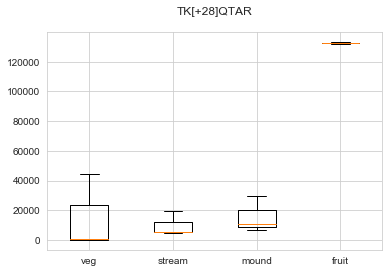

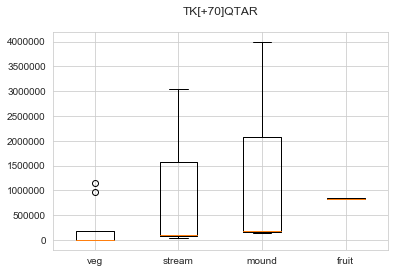

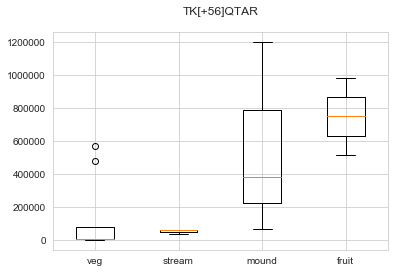

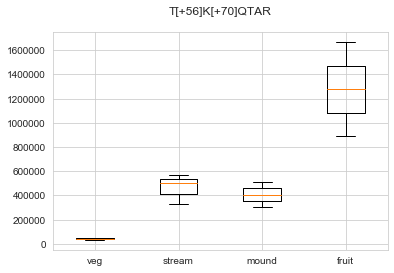

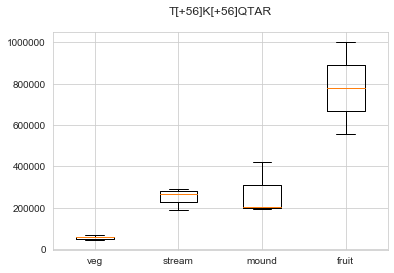

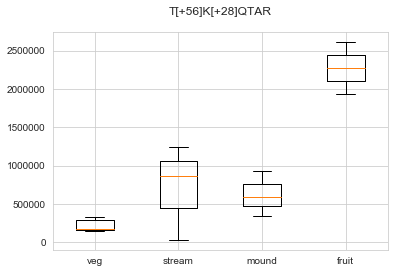

In [76]:
# for each modified peptide
for pepmodseq in test_df['Peptide Modified Sequence'].drop_duplicates():
    #print(pepmodseq)
        
    temp_df = test_df[test_df['Peptide Modified Sequence'] == pepmodseq]
    temp_df = temp_df.drop_duplicates()
    #print(test_df)
    
    # make a box-and-whisker plot
    veg = temp_df[temp_df['Sample Group'] == 'vegetative']['Normalized Abundance']
    stream = temp_df[temp_df['Sample Group'] == 'streaming']['Normalized Abundance']
    mound = temp_df[temp_df['Sample Group'] == 'mound']['Normalized Abundance']
    fruit = temp_df[temp_df['Sample Group'] == 'fruiting']['Normalized Abundance']
    
    plt.boxplot((veg, stream, mound, fruit))
    plt.xticks([1,2,3,4], 
               ['veg', 'stream', 'mound', 'fruit'])
    plt.title(pepmodseq+"\n")
    plt.show()

# group the bars by mark, with a bar for each sample group


TK[+28]QTAR


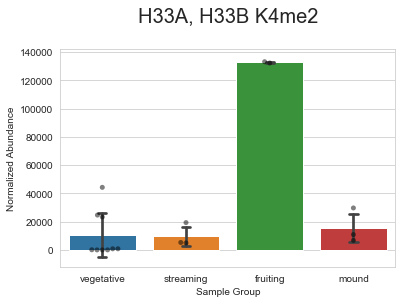

TK[+70]QTAR


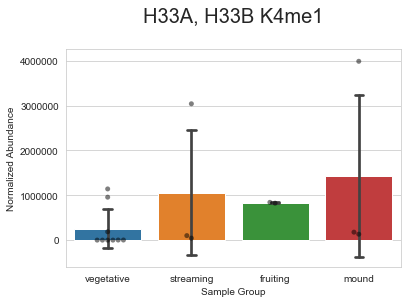

TK[+56]QTAR


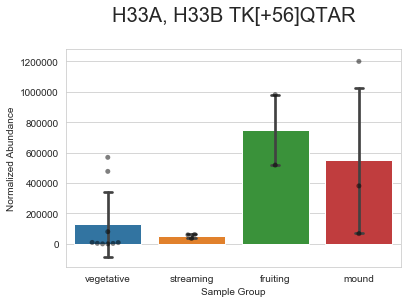

T[+56]K[+70]QTAR


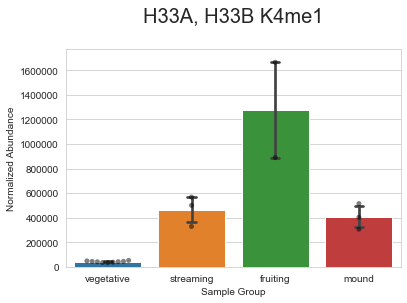

T[+56]K[+56]QTAR


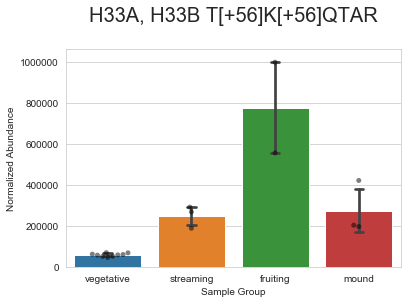

T[+56]K[+28]QTAR


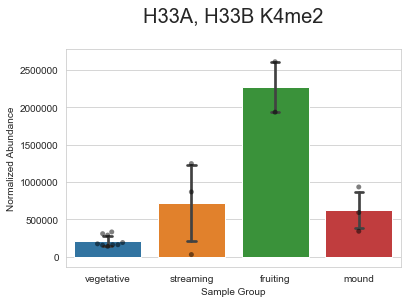

In [102]:
# for each modified peptide
for pepmodseq in test_df['Peptide Modified Sequence'].drop_duplicates():
    print(pepmodseq)
    
    temp_df = test_df[test_df['Peptide Modified Sequence'] == pepmodseq]
    temp_df = temp_df.drop_duplicates()
    #print(test_df)
    
    protein = temp_df['Protein'].iloc[0]
    
    # prettify protein name
    # TODO use SeqIO to parse protein names in a less stupid way
    if "|" in protein:
        if "," in protein:
            protein_list = protein.split(',')
            new_protein = []
            for prot in protein_list:
                temp = str(prot.split("|")[-1])
                new_protein.append(temp)
            new_protein = ', '.join(new_protein)
        else:
            new_protein = prot.split("|")[-1]
            
    protein = new_protein
    
    # TODO remove this hardcoded DICDI cleanup
    protein = protein.replace('_DICDI', '')
    
    if temp_df['histone mark'].any():
        his_mark = temp_df['histone mark'].iloc[0]
        his_mark = his_mark.replace('[', '')
        his_mark = his_mark.replace(']', '')
        title = protein + ' ' + his_mark
    else:
        title = protein + ' ' + pepmodseq
    
    # make a barchart
    sns.barplot(x = 'Sample Group', y = 'Normalized Abundance', data = temp_df,
                capsize=.1, ci="sd")
    sns.swarmplot(x = 'Sample Group', y = 'Normalized Abundance', data = temp_df,
                  color="0", alpha=.5)
    plt.title(title+"\n",fontsize=20)
    plt.show()

# group the bars by mark, with a bar for each sample group
